In [10]:
using Distributions
using Plots
using LaTeXStrings
using Interact
using Optim
#pyplot()

In [11]:
measurement(theta; wf=0.5) = Normal(theta, wf * theta)

measurement (generic function with 1 method)

In [12]:
measurement_log(theta; wf=0.5) = LogNormal(log(theta), wf)

measurement_log (generic function with 1 method)

## Different Weber fractions

For the standard deviations scaled by a WF of 0.5 as demonstrated above, the log-normal distribution is very different from the normal distribution. For other parameters, the approximation of the log-normal by the normal works rather well. Let us now examine for which range of parameters this approximation holds.

### Measurement distributions

In [13]:
m = 0:0.01:10

@manipulate for theta=1.0:0.5:5, w=0.1:0.05:1.0
    plot([theta, theta], [0., 0.5], linestyle=:dot, color=2, label=L"\theta", xlabel=L"m", ylabel=L"p(m|\theta)")
    plot!(m, pdf.(measurement(theta, wf=w), m), color=0, label="norm", ylim=(0, 1.0))
    plot!(m, pdf.(measurement_log(theta, wf=w), m), color=1, label="lognorm")
end


Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["theta"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 9,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/dominik/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/dominik/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/dominik/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f4b1a27ba90, Task (runnable) @0x00007f4b1a27ba90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"1.5\",\"2.0\",\"2.5\",\"3.0\",\"3.5\",\"4.0\",\"4.5\",\"5.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"17789483747575961760\",\"id\":\"ob_39\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"

### Likelihoods

In [7]:
t = 0:0.01:10

@manipulate for m0=1:0.5:5, w=0.1:0.05:1.0
    plot([m0, m0], [0., 0.5], linestyle=:dot, color=2, label=L"m", xlabel=L"\theta", ylabel=L"p(m|\theta)")
    plot!(t, pdf.(measurement.(t, wf=w), m0), label="norm", ylim=(0, 0.5), color=0)
    plot!(t, pdf.(measurement_log.(t, wf=w), m0), label="lognorm", ylim=(0, 1.0), color=1)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["m0"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 9,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/dominik/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f627b16b0d0, Task (runnable) @0x00007f627b16b0d0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"1.5\",\"2.0\",\"2.5\",\"3.0\",\"3.5\",\"4.0\",\"4.5\",\"5.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"12339493198958387705\",\"id\":\"ob_39\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"sco

### Standard deviation of measurement distribution

In [8]:
t = 0:0.01:10

@manipulate for w=0.05:0.01:0.5
    plot(t, [std(measurement(ti, wf=w)) for ti in t], color=0, label="norm", ylim=(0, 3))
    plot!(t, [std(measurement_log(ti, wf=w)) for ti in t], color=1, label="lognorm")
    plot!(t, w*t, label=L"\sigma = w \cdot \theta")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["w"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 46,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
23, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/dominik/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f627b259fc0, Task (runnable) @0x00007f627b259fc0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.05\",\"0.06\",\"0.07\",\"0.08\",\"0.09\",\"0.1\",\"0.11\",\"0.12\",\"0.13\",\"0.14\",\"0.15\",\"0.16\",\"0.17\",\"0.18\",\"0.19\",\"0.2\",\"0.21\",\"0.22\",\"0.23\",\"0.24\",\"0.25\",\"0.26\",\"0.27\",\"0.28\",\"0.29\",\"0.3\",\"0.31\",\"0.3

In [9]:
sigma = 0.1

# compute the weber fraction from a sigma of a log-normal
function weber_fraction(sigma)
    return sqrt(exp(sigma^2) - 1) * exp(sigma^2 / 2)
end

weber_fraction(sigma)

0.10075302944620396

## Estimates

Based on the likelihood function, the observer has to form an estimate. Here, we can make various different assumptions. Does the observer do an ML estimate? This implies that the observer takes its estimate as the maximum of the likelihood function. Alternatively, the observer could be Bayesian (which in addition requires some prior distribution) and use e.g. either a MAP estimate or the posterior mean or median.

Let us start with the simplest case, a ML estimate.

In [10]:
function maximum_likelihood(d, m; wf)
    f(x) = -logpdf(d(x, wf=wf), m)

    result = optimize(f, 0., 10)
    return Optim.minimizer(result)
end

maximum_likelihood (generic function with 1 method)

In [11]:
linreg(x, y) = [ones(size(x)) x] \ y

linreg (generic function with 1 method)

## Expected estimate under noise model for a given stimulus
The estimator derives an estimate $\hat\theta(m)$ for an observation m. We as the observer to not have access to the noisy internal observation (although we can treat it as a latent variable in a sampling model). What we have is the actually presented stimulus $\theta_0$. We are interested in the distribution / expectation of estimates under to observation model:

$$
<\hat\theta>_{\theta_0} = \int \hat\theta(m) p(m | \theta_0) dm
$$

In the case of a Gaussian measurement distribution (no matter if the standard deviation is scaled, since we are looking at a fixed value $\theta_0$), the estimate is $\hat\theta(m) = c \cdot m$ (see Jazayeri & Shadlen, 2010, for the value of $c$). Because the estimate is linear in $m$, the expected estimate for a given $\theta_0$ is simply $c \cdot \theta_0$. Same for a Lognormal, but with $c = 1$.

In [12]:
t = 0.01:0.01:5


@manipulate for w=0.1:0.05:1.0
    # TODO: compute maximum likelihood for different values of m
    theta_hat = [maximum_likelihood(measurement, x, wf=w)[1] for x in t]
    theta_hat_log = [maximum_likelihood(measurement_log, x, wf=w)[1] for x in t]
    

    _, slope = linreg(t, theta_hat)
    _, slope_log = linreg(t, theta_hat_log)
    
    plot(t, theta_hat, label="ML (Gaussian), y = $(round(slope, digits=2)) * x", color=0)
    plot!(t, theta_hat_log, label="ML (Lognormal), y = $(round(slope_log, digits=2)) * x", color=1)
    plot!(t, t, linestyle=:dash, label="y = x", xlabel=L"\theta", ylabel=L"\theta")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["w"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 19,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/dominik/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f627b0a5870, Task (runnable) @0x00007f627b0a5870), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.15\",\"0.2\",\"0.25\",\"0.3\",\"0.35\",\"0.4\",\"0.45\",\"0.5\",\"0.55\",\"0.6\",\"0.65\",\"0.7\",\"0.75\",\"0.8\",\"0.85\",\"0.9\",\"0.95\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"1133216523386442137\",\"

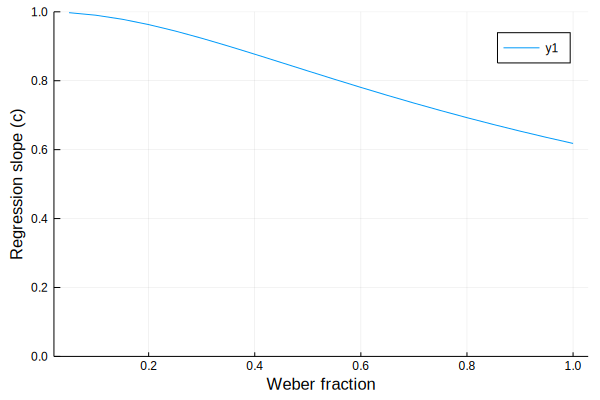

In [13]:
wfs = 0.05:0.05:1.0
slopes = [linreg(t, [maximum_likelihood(measurement, x, wf=w)[1] for x in t])[2] for w in wfs]

plot(wfs, slopes, ylim=(0,1), xlabel="Weber fraction", ylabel="Regression slope (c)")

In [ ]:
# alternative: closed-form solution for c
mle_factor(w) = (sqrt(1 + 4 * w^2) - 1) / (2 * w^2)

w = 0:0.01:1

plot(w, mle_factor.(w), xlabel="w", ylabel="Slope", label=nothing, ylim=(0, 1))

## Posterior distributions (for log-normals)
All of the above was for a ML estimator. In the following, we introduce a prior distribution and look at different estimates based on the posterior distribution, starting with the MAP estimate. For simplicity, we only consider the log-normal case with a log-normal prior.

In [15]:
sigma_prior = 1.0

function lognormal_posterior(mu_prior, sigma_prior, m, w)
    sigma_post = 1 / (1 / sigma_prior^2 + 1 / w^2)
    mu_post = sigma_post * (log(mu_prior) / sigma_prior^2 + log(m) / w^2)
    
    return LogNormal(mu_post, sigma_post)
end

@manipulate for m=1:0.5:5, w=0.1:0.05:1.0, mu_prior=1.0:0.2:4    
    posterior = lognormal_posterior(mu_prior, sigma_prior, m, w)
    
    plot(t, pdf.(LogNormal(log(mu_prior), sigma_prior), t), label="prior")
    plot!(t, pdf.(measurement_log.(t, wf=w), m), label="likelihood", ylim=(0, 1.0))
    plot!(t, pdf.(posterior, t), label="posterior")
    plot!([mode(posterior), mode(posterior)], [0, 0.75], label="MAP", xlabel=L"\theta")
    plot!([m, m], [0, 0.75], label=L"m")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["m"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 9,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
5, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/dominik/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f627c75ba90, Task (runnable) @0x00007f627c75ba90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1.0\",\"1.5\",\"2.0\",\"2.5\",\"3.0\",\"3.5\",\"4.0\",\"4.5\",\"5.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"18028427676909357792\",\"id\":\"ob_84\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scop

MethodError: no method matching length(::Widget{:slider,Float64})
Closest candidates are:
  length(::Core.SimpleVector) at essentials.jl:593
  length(::Base.MethodList) at reflection.jl:849
  length(::Core.MethodTable) at reflection.jl:923
  ...
Stacktrace:
 [1] _similar_for(::UnitRange{Int64}, ::Type{Float64}, ::Widget{:slider,Float64}, ::Base.HasLength) at ./array.jl:533
 [2] _collect(::UnitRange{Int64}, ::Widget{:slider,Float64}, ::Base.HasEltype, ::Base.HasLength) at ./array.jl:566
 [3] collect(::Widget{:slider,Float64}) at ./array.jl:560
 [4] broadcastable(::Widget{:slider,Float64}) at ./broadcast.jl:664
 [5] broadcasted(::Function, ::Normal{Float64}, ::Widget{:slider,Float64}) at ./broadcast.jl:1235
 [6] (::var"#9#10")(::Float64, ::Float64) at ./In[6]:5
 [7] (::Observables.var"#16#17"{var"#9#10",Observable{Any}})(::Float64, ::Vararg{Float64,N} where N) at /home/dominik/.julia/packages/Observables/qCJWB/src/Observables.jl:152
 [8] (::Observables.var"#g#15"{Observables.var"#16#17"{

MethodError: MethodError: no method matching length(::Widget{:slider,Float64})
Closest candidates are:
  length(!Matched::Core.SimpleVector) at essentials.jl:593
  length(!Matched::Base.MethodList) at reflection.jl:849
  length(!Matched::Core.MethodTable) at reflection.jl:923
  ...

MethodError: MethodError: no method matching length(::Widget{:slider,Float64})
Closest candidates are:
  length(!Matched::Core.SimpleVector) at essentials.jl:593
  length(!Matched::Base.MethodList) at reflection.jl:849
  length(!Matched::Core.MethodTable) at reflection.jl:923
  ...

MethodError: no method matching length(::Widget{:slider,Float64})
Closest candidates are:
  length(::Core.SimpleVector) at essentials.jl:593
  length(::Base.MethodList) at reflection.jl:849
  length(::Core.MethodTable) at reflection.jl:923
  ...
Stacktrace:
 [1] _similar_for(::UnitRange{Int64}, ::Type{Float64}, ::Widget{:slider,Float64}, ::Base.HasLength) at ./array.jl:533
 [2] _collect(::UnitRange{Int64}, ::Widget{:slider,Float64}, ::Base.HasEltype, ::Base.HasLength) at ./array.jl:566
 [3] collect(::Widget{:slider,Float64}) at ./array.jl:560
 [4] broadcastable(::Widget{:slider,Float64}) at ./broadcast.jl:664
 [5] broadcasted(::Function, ::Normal{Float64}, ::Widget{:slider,Float64}) at ./broadcast.jl:1235
 [6] (::var"#9#10")(::Float64, ::Float64) at ./In[6]:5
 [7] (::Observables.var"#16#17"{var"#9#10",Observable{Any}})(::Float64, ::Vararg{Float64,N} where N) at /home/dominik/.julia/packages/Observables/qCJWB/src/Observables.jl:152
 [8] (::Observables.var"#g#15"{Observables.var"#16#17"{

### A posteriori estimates (for a given measurement)



In [57]:
m = 1.0:0.01:5


@manipulate for w=0.1:0.05:1.0, mu_prior=1.0:0.2:5.0, sigma_prior=0.2:0.2:5.0
    
    max_likelihood = [maximum_likelihood(measurement_log, m0, wf=w)[1] for m0 in m] 
    posteriors = [lognormal_posterior(mu_prior, sigma_prior, m0, w) for m0 in m]

    plot(m, mode.(posteriors), label="MAP")
    plot!(m, mean.(posteriors), label="Mean")
    plot!(m, median.(posteriors), label="Median")
#     w_prior = 1 / sigma_prior^2 / (1 / sigma_prior^2 + 1 / w^2)
#     w_m = 1 / w^2 / (1 / sigma_prior^2 + 1 / w^2)

    plot!(m, max_likelihood, label="MLE")
    plot!(m, m, label=L"\hat\theta = \theta", ylim=(minimum(m), maximum(m)), color="black", linestyle=:dash, xlabel=L"m", legend=:bottomright)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["w"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 19,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Any} with 2 listeners. Value:
10, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/dominik/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/home/dominik/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/home/dominik/.julia/packages/Interact/SbgIk/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x00007f3f8eaa4010, Task (runnable) @0x00007f3f8eaa4010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0.1\",\"0.15\",\"0.2\",\"0.25\",\"0.3\",\"0.35\",\"0.4\",\"0.45\",\"0.5\",\"0.55\",\"0.6\",\"0.65\",\"0.7\",\"0.75\",\"0.8\",\"0.85\",\"0.9\",\"0.95\",\"1.0\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"4634124291021278406\",\"